# Micro-Credit Defaulter Model

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Data file.csv')

To display all the columns of the dataset

In [3]:
pd.pandas.set_option('display.max_columns',None)

First 5 entries

In [4]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [5]:
df.shape

(209593, 37)

The dataset contains 209593 rows and 37 columns.

Information about the datatype of the features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Unique number of values in each column

In [7]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

# Dropping of columns

In [8]:
#Change dtype of pdate to datetime64
df['pdate']=pd.to_datetime(df['pdate'])

In [9]:
df['pdate']

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

In [10]:
#Extract new column of month and day
df['pmonth']=df['pdate'].dt.month
df['pday']=df['pdate'].dt.day

In [11]:
df['pmonth']

0         7
1         8
2         8
3         6
4         6
         ..
209588    6
209589    6
209590    7
209591    7
209592    7
Name: pmonth, Length: 209593, dtype: int64

In [12]:
df['pday']

0         20
1         10
2         19
3          6
4         22
          ..
209588    17
209589    12
209590    29
209591    25
209592     7
Name: pday, Length: 209593, dtype: int64

In [13]:
#Drop pdate column
df=df.drop(['pdate'],axis=1)

In [14]:
#dropping unnamed column
df=df.drop(['Unnamed: 0'],axis=1)

In [15]:
#dropping msisdn column
df=df.drop(['msisdn'],axis=1)

In [16]:
#dropping pcircle column
df=df.drop(['pcircle'],axis=1)

In [17]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pmonth  pday  
0                 0.0  29.000000  29.000000       7    20  
1                 0.0   0.000000   0.000000       8    10  
2                 0.0   0.000000   0.000000       8    19  
3                 0.0   0.000000   0.000000       6     6  
4                 0.0   2.333333   2.333333       6    22

# Missing Values

In [18]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pmonth                  0
pday                    0
dtype: int64

Dataset doesnot contain any null values.

Heatmap of the null values.

<AxesSubplot:>

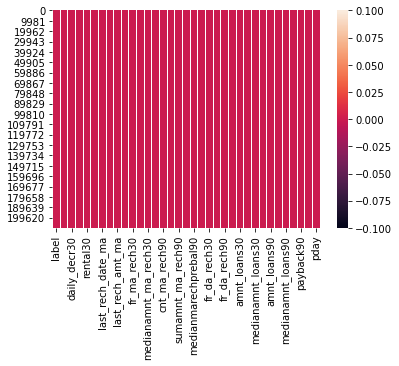

In [19]:
sns.heatmap(df.isnull())

# Statistical Calculation

In [20]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

Maximum value is much larger than the 75th percentile in nearly all the columns.
Except date column all other column contains 0 and negative values.
Also label column shows unbalanced data.

# Box Plots showing outliers

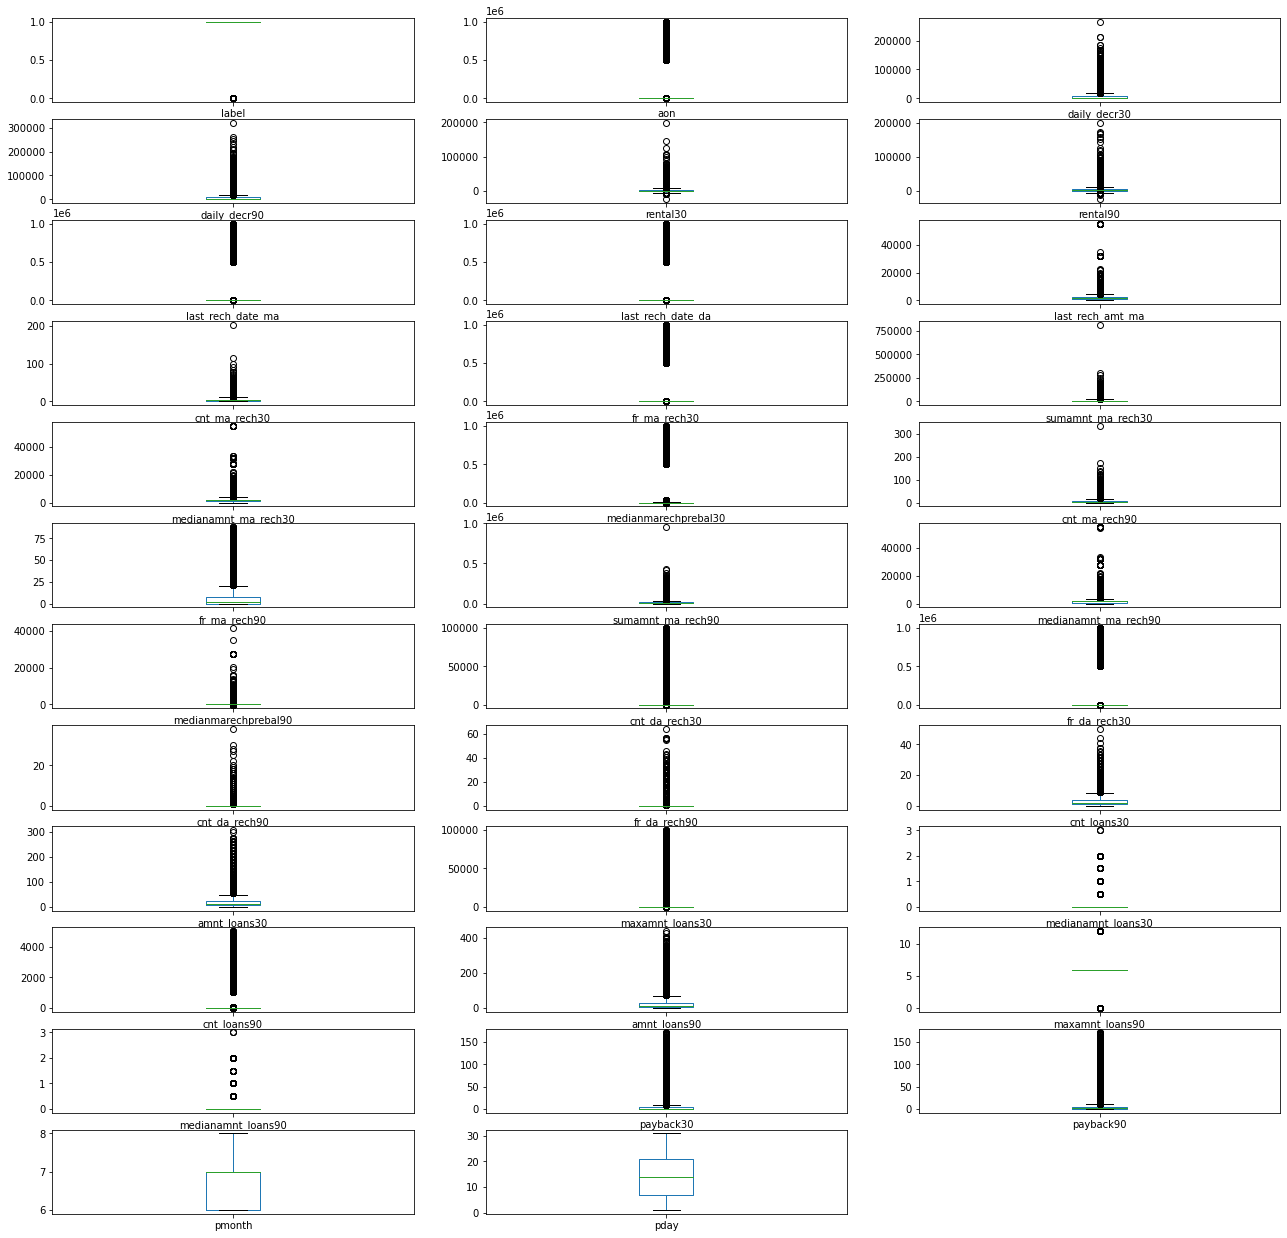

In [21]:
df.plot(kind='box', subplots=True, layout=(12,3), sharex=False, legend=False, figsize=(22,22))
plt.show()

Except pmonth and pday all other features contain outliers.

# Distribution plots

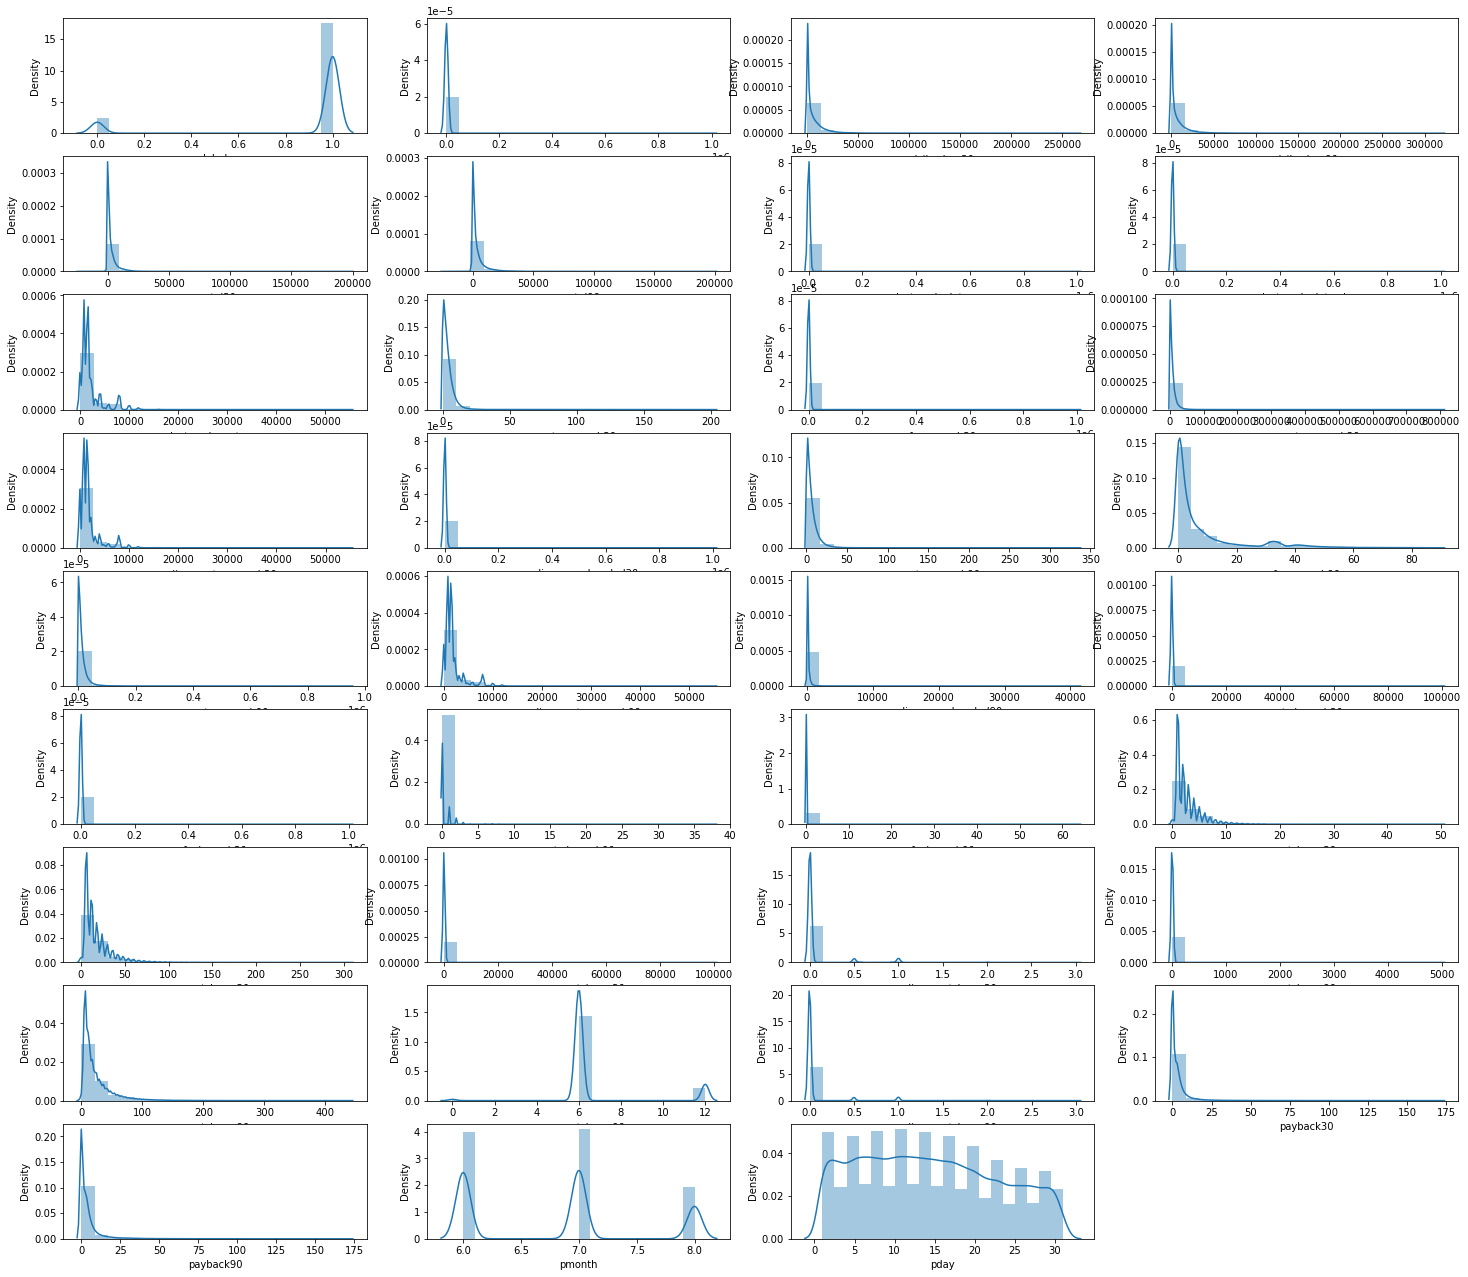

In [22]:
collist=df.columns.values
ncol=4
nrows=10
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],bins=20)

Distribution plot shows skewness in all the features except pmonth and pday.

# Strip plots

Bivariate Analysis of some important features with respect to label i.e output is plotted.It is observed that features of 30 days and 90 days are highly correlated and in all the features label 1 has majority which indicate non-defaulters.

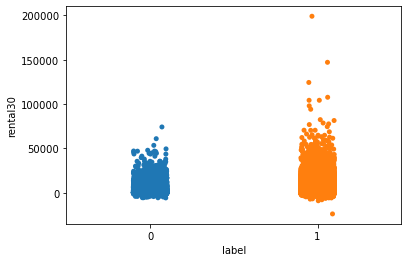

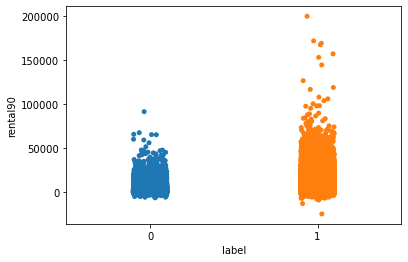

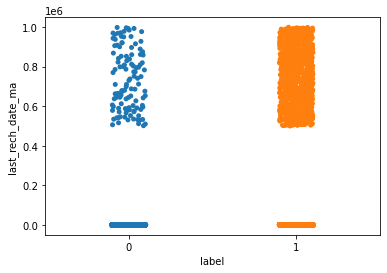

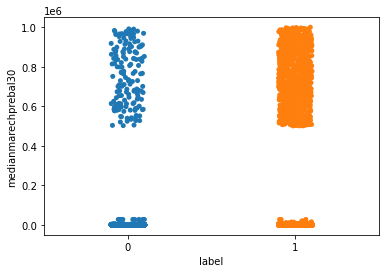

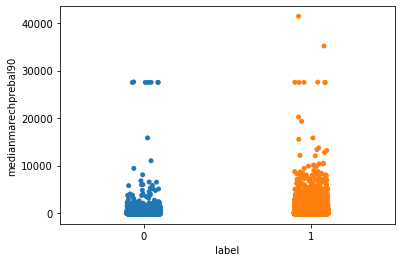

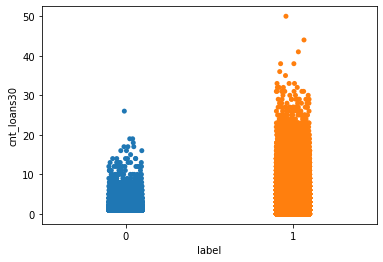

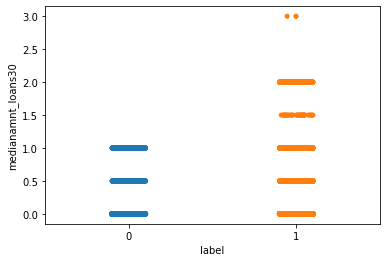

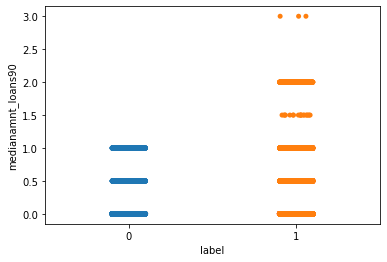

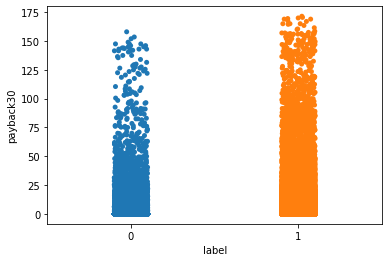

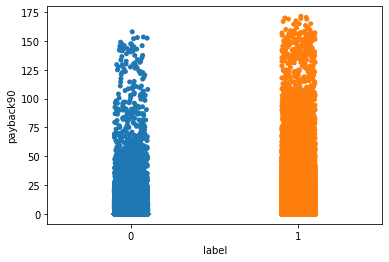

In [23]:
m=["rental30","rental90",'last_rech_date_ma','medianmarechprebal30','medianmarechprebal90','cnt_loans30','medianamnt_loans30',
   'medianamnt_loans90','payback30','payback90']
for col in m:
    plt.subplots()
    sns.stripplot(x=df["label"],y=df[col]);

# Checking Correlation

In [24]:
dfcor=df.corr()
dfcor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
pmonth                0.154949 -0.001863      0.518664      0.539410   
pday                  0.006825  0.000662      0.006477     -0.021508   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282      

# Correlation Heatmap

<AxesSubplot:>

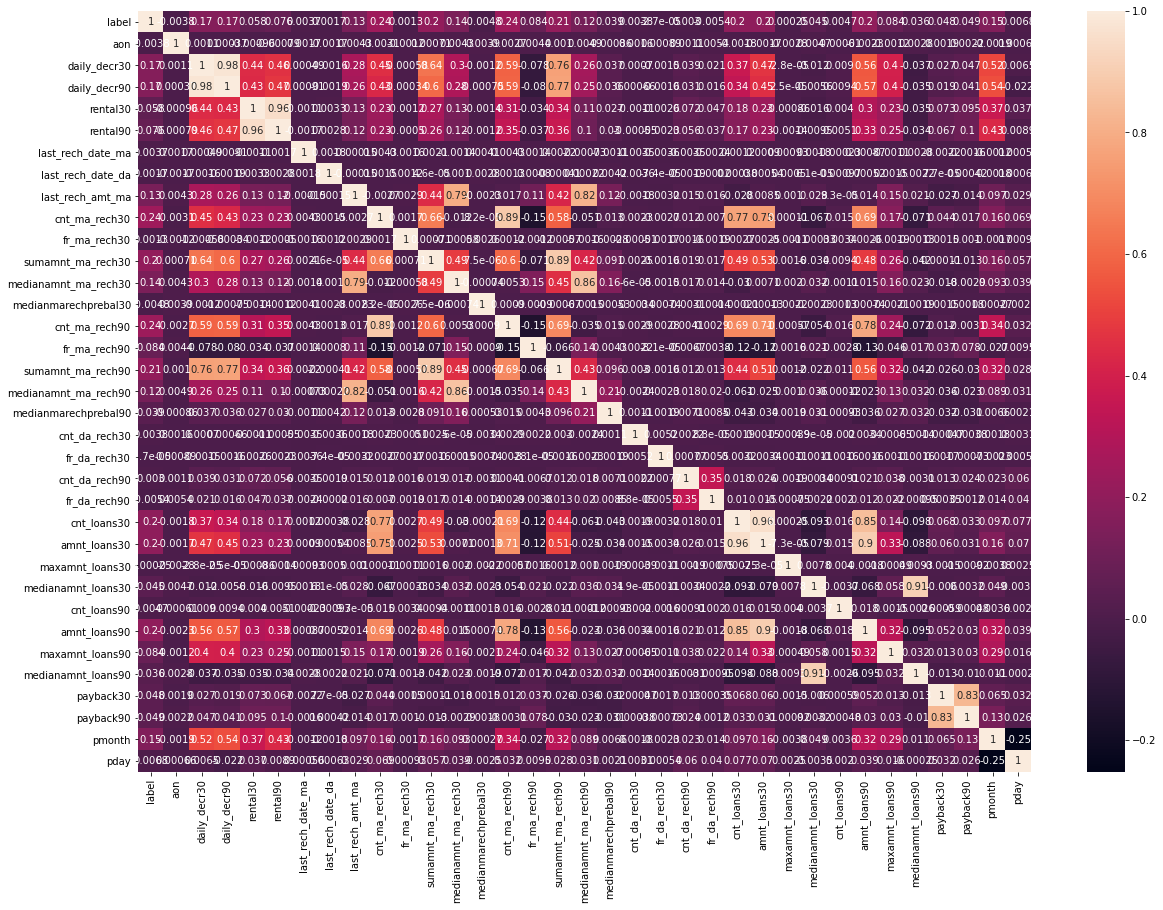

In [25]:
plt.figure(figsize=(20,14))
sns.heatmap(dfcor,annot=True)

Some of the highly correlated features are "daily_decr30", "daily_decr90", "rental_30", "rental_90", "cnt_loans30", "amnt_loans30"

# Checking class balance

In [26]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

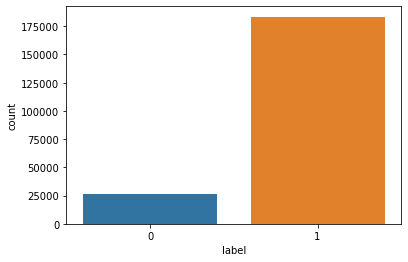

In [27]:
sns.countplot(df["label"]);

count plot shows clear class imbalance.

# Data Cleaning and processing

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 2.39409346, 0.27336037,
        0.6637208 ],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.41923266, 1.62209905,
        0.52127058],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.41923266, 1.62209905,
        0.54522166],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.04735622, 0.27336037,
        1.73021304],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.59938541, 0.27336037,
        1.25621649],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.41923266, 0.27336037,
        0.87676799]])

In [29]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [30]:
z[21][15]

4.4703916213001245

In [31]:
z[22][32]

3.6552396504837366

In [32]:
z[209587][30]

4.753189062627214

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

In [34]:
df.shape

(209593, 35)

In [35]:
df_new.shape

(161465, 35)

As not more than 7-8% data can be removed we will not remove outliers.

# Separating x(Independent) and y(target) variable.

In [36]:
x=df.drop('label',axis=1)
y=df['label']

In [37]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                0.0              1539              2          21.0   
1                0.0              5787              1           0.0   
2                0.0              1539              1           0.0   
3                0.0               947              0           0.0   
4                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0             3078.0                1539.0                  7.50   
1             5787.0                5787.0                 61.04   
2             1539.0                1539.0                 66.32   
3                0.0                   0.0                  0.00   
4            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0              2            21               3078                1539.0   
1              1             0               5787                5787.0   
2              1             0               1539                1539.0   
3              1             0                947                 947.0   
4              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  7.50            0.0           0.0              0   
1                 61.04            0.0           0.0              0   
2                 66.32            0.0           0.0              0   
3                  2.50            0.0           0.0              0   
4                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12              6.0   
1             0            1            12             12.0   
2             0            1             6              6.0   
3             0            2            12              6.0   
4             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pmonth  pday  
0                 0.0  29.000000  29.000000       7    20  
1                 0.0   0.000000   0.000000       8    10  
2                 0.0   0.000000   0.000000       8    19  
3                 0.0   0.000000   0.000000       6     6  
4                 0.0   2.333333   2.333333       6    22

In [38]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [39]:
x.shape

(209593, 34)

In [40]:
y.shape

(209593,)

# Balancing the class

In [41]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

1    183431
0    183431
Name: label, dtype: int64

Output variable is balanced using over-fitting method.

# Removing skewness

Skewness is removed using squareroot method, power transformer method and cuberoot method

In [42]:
x_over.skew()

aon                     10.022354
daily_decr30             4.857321
daily_decr90             5.290530
rental30                 4.457767
rental90                 4.528915
last_rech_date_ma       15.215252
last_rech_date_da       15.163145
last_rech_amt_ma         5.171696
cnt_ma_rech30            3.626814
fr_ma_rech30            14.791713
sumamnt_ma_rech30        6.799820
medianamnt_ma_rech30     4.757958
medianmarechprebal30    14.110168
cnt_ma_rech90            3.926377
fr_ma_rech90             2.532716
sumamnt_ma_rech90        5.576441
medianamnt_ma_rech90     5.019053
medianmarechprebal90    47.757937
cnt_da_rech30           18.509840
fr_da_rech30            14.490272
cnt_da_rech90           28.739027
fr_da_rech90            27.250744
cnt_loans30              3.423323
amnt_loans30             3.651451
maxamnt_loans30         17.689565
medianamnt_loans30       5.116227
cnt_loans90             17.348975
amnt_loans90             3.924135
maxamnt_loans90          2.341186
medianamnt_loa

In [43]:
np.sqrt(x_over).skew()

aon                      9.460375
daily_decr30             1.515747
daily_decr90             1.645736
rental30                 1.303942
rental90                 1.369258
last_rech_date_ma       14.554675
last_rech_date_da       14.579825
last_rech_amt_ma         0.722085
cnt_ma_rech30            0.574742
fr_ma_rech30            14.258473
sumamnt_ma_rech30        1.011998
medianamnt_ma_rech30     0.632577
medianmarechprebal30    13.311194
cnt_ma_rech90            0.824832
fr_ma_rech90             1.229528
sumamnt_ma_rech90        1.195032
medianamnt_ma_rech90     0.654515
medianmarechprebal90     5.215068
cnt_da_rech30           16.093824
fr_da_rech30            13.972607
cnt_da_rech90            9.823967
fr_da_rech90            17.084206
cnt_loans30              1.716514
amnt_loans30             1.720973
maxamnt_loans30         15.411365
medianamnt_loans30       3.962532
cnt_loans90             14.437247
amnt_loans90             1.906910
maxamnt_loans90         -0.571200
medianamnt_loa

In [44]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=True)
x_over=pd.DataFrame(pt.fit_transform(x_over),columns=x_over.columns)
x_over

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.148057      0.650878      0.623619 -0.532555 -0.519379   
1       0.056996      1.391546      1.337098  0.429311  0.258426   
2      -0.011286      0.315692      0.297137 -0.307403 -0.345329   
3      -0.169275     -0.784111     -0.779104 -0.556174 -0.551577   
4       0.132306     -0.388494     -0.389772 -0.248201 -0.296535   
...          ...           ...           ...       ...       ...   
366857 -0.283525     -1.029647     -1.022623 -0.625871 -0.610248   
366858 -0.295891     -1.168376     -1.161128 -0.631519 -0.615104   
366859 -0.135936      0.654931      0.627237 -0.533495 -0.530909   
366860 -0.229067      0.640205      0.612760 -0.320906 -0.319584   
366861  0.178808     -0.991113     -0.984284 -0.631519 -0.615104   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.051070          -0.077828          0.369810       0.216250   
1                0.208049          -0.077828          1.500208      -0.315799   
2               -0.020020          -0.077828          0.369810      -0.315799   
3                0.334121          -0.077828          0.055901      -1.348995   
4                0.005601          -0.077828          0.669597       1.314974   
...                   ...                ...               ...            ...   
366857           0.039026          -0.077828         -0.062336      -0.315799   
366858          -0.151580          -0.077828         -1.689998      -1.348995   
366859           0.157590          -0.077828          1.149632      -0.315799   
366860          -0.031711          -0.077828          0.369810       0.216250   
366861          -0.151580          -0.077828         -1.689998      -1.348995   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           1.682933           0.313389              0.509016   
1          -0.897268           0.627345              1.539943   
2          -0.897268           0.012677              0.509016   
3          -0.897268          -1.514957             -1.551434   
4           0.560179           1.377789              0.786405   
...              ...                ...                   ...   
366857     -0.897268          -0.246323              0.102830   
366858     -0.897268          -1.514957             -1.551434   
366859     -0.897268           0.444613              1.224328   
366860      1.373494           0.313389              0.509016   
366861     -0.897268          -1.514957             -1.551434   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  -0.017620      -0.059950      1.443112           0.071819   
1                   0.040209      -0.537663     -0.976193           0.375625   
2                   0.043991      -0.537663     -0.976193          -0.217085   
3                  -0.040578      -0.537663     -0.976193          -0.395047   
4                   0.012428       1.064985      0.290567           1.218933   
...                      ...            ...           ...                ...   
366857              0.150580      -0.537663     -0.976193          -0.464051   
366858             -0.040578      -1.443892     -0.976193          -1.635844   
366859             -0.002639      -0.537663     -0.976193           0.198546   
366860              0.054660       0.257507      1.523549           0.199252   
366861             -0.040578      -1.443892     -0.976193          -1.635844   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                   0.409092             -0.220794      -0.148525   
1                   1.608574              0.101792      -0.148525   
2                   0.409092              0.127936      -0.148525   
3                   0.079648             -0.266920      -0.148525   
4                   0.917701             -0.037219      -0.148525   
...                      ...                   ...            ...  

In [45]:
np.cbrt(x_over).skew()

aon                      0.382832
daily_decr30             0.081610
daily_decr90             0.093879
rental30                 0.838865
rental90                 0.848569
last_rech_date_ma        0.141968
last_rech_date_da        5.422964
last_rech_amt_ma        -0.253879
cnt_ma_rech30           -0.032451
fr_ma_rech30             0.170346
sumamnt_ma_rech30       -0.504033
medianamnt_ma_rech30    -0.884222
medianmarechprebal30    -0.350313
cnt_ma_rech90            0.072874
fr_ma_rech90             0.168506
sumamnt_ma_rech90       -0.263762
medianamnt_ma_rech90    -0.319086
medianmarechprebal90     0.554522
cnt_da_rech30            6.561935
fr_da_rech30            10.366339
cnt_da_rech90            7.226292
fr_da_rech90            13.024905
cnt_loans30              0.411402
amnt_loans30             0.262299
maxamnt_loans30          2.124191
medianamnt_loans30       3.432892
cnt_loans90              0.177690
amnt_loans90             0.183625
maxamnt_loans90          2.592434
medianamnt_loa

In [46]:
y_over.skew()

0.0

# Standardization

Standard Scalar is used for scaling.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)
x_over

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.148057      0.650878      0.623619 -0.532555 -0.519379   
1       0.056996      1.391546      1.337098  0.429311  0.258426   
2      -0.011286      0.315692      0.297137 -0.307403 -0.345329   
3      -0.169275     -0.784111     -0.779104 -0.556174 -0.551577   
4       0.132306     -0.388494     -0.389772 -0.248201 -0.296535   
...          ...           ...           ...       ...       ...   
366857 -0.283525     -1.029647     -1.022623 -0.625871 -0.610248   
366858 -0.295891     -1.168376     -1.161128 -0.631519 -0.615104   
366859 -0.135936      0.654931      0.627237 -0.533495 -0.530909   
366860 -0.229067      0.640205      0.612760 -0.320906 -0.319584   
366861  0.178808     -0.991113     -0.984284 -0.631519 -0.615104   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.051070          -0.077828          0.369810       0.216250   
1                0.208049          -0.077828          1.500208      -0.315799   
2               -0.020020          -0.077828          0.369810      -0.315799   
3                0.334121          -0.077828          0.055901      -1.348995   
4                0.005601          -0.077828          0.669597       1.314974   
...                   ...                ...               ...            ...   
366857           0.039026          -0.077828         -0.062336      -0.315799   
366858          -0.151580          -0.077828         -1.689998      -1.348995   
366859           0.157590          -0.077828          1.149632      -0.315799   
366860          -0.031711          -0.077828          0.369810       0.216250   
366861          -0.151580          -0.077828         -1.689998      -1.348995   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           1.682933           0.313389              0.509016   
1          -0.897268           0.627345              1.539943   
2          -0.897268           0.012677              0.509016   
3          -0.897268          -1.514957             -1.551434   
4           0.560179           1.377789              0.786405   
...              ...                ...                   ...   
366857     -0.897268          -0.246323              0.102830   
366858     -0.897268          -1.514957             -1.551434   
366859     -0.897268           0.444613              1.224328   
366860      1.373494           0.313389              0.509016   
366861     -0.897268          -1.514957             -1.551434   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  -0.017620      -0.059950      1.443112           0.071819   
1                   0.040209      -0.537663     -0.976193           0.375625   
2                   0.043991      -0.537663     -0.976193          -0.217085   
3                  -0.040578      -0.537663     -0.976193          -0.395047   
4                   0.012428       1.064985      0.290567           1.218933   
...                      ...            ...           ...                ...   
366857              0.150580      -0.537663     -0.976193          -0.464051   
366858             -0.040578      -1.443892     -0.976193          -1.635844   
366859             -0.002639      -0.537663     -0.976193           0.198546   
366860              0.054660       0.257507      1.523549           0.199252   
366861             -0.040578      -1.443892     -0.976193          -1.635844   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                   0.409092             -0.220794      -0.148525   
1                   1.608574              0.101792      -0.148525   
2                   0.409092              0.127936      -0.148525   
3                   0.079648             -0.266920      -0.148525   
4                   0.917701             -0.037219      -0.148525   
...                      ...                   ...            ...  

# Finding the best random state

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8037961457036681 on Random State:  7


# Train Test Split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=7)

# Removing highly correlated features

In [70]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for t in range(len(corr_matrix.columns)):
        for j in range(t):
            if (corr_matrix.iloc[t,j])>threshold:
                colname=corr_matrix.columns[t]
                col_corr.add(colname)
    return col_corr

In [71]:
corr_features=correlation(x_train,0.98)
len(set(corr_features))

1

In [72]:
corr_features

{'daily_decr90'}

In [73]:
x_train=x_train.drop('daily_decr90',axis=1)
x_test=x_test.drop('daily_decr90',axis=1)


Highly correlated column "daily_decr90" is removed so as to prevent overfitting.

In [74]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (256803, 33)
x_test (110059, 33)
y_train (256803,)
y_test (110059,)


# Model Selection

In [75]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8010339908594482
[[44156 10603]
 [11295 44005]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     54759
           1       0.81      0.80      0.80     55300

    accuracy                           0.80    110059
   macro avg       0.80      0.80      0.80    110059
weighted avg       0.80      0.80      0.80    110059



In [76]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.7392671203627146
[[43195 11564]
 [17132 38168]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     54759
           1       0.77      0.69      0.73     55300

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.74    110059
weighted avg       0.74      0.74      0.74    110059



In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.9080947491799852
[[50276  4483]
 [ 5632 49668]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     54759
           1       0.92      0.90      0.91     55300

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059



# Ensemble technique 

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.9485730380977476
[[51747  3012]
 [ 2648 52652]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     54759
           1       0.95      0.95      0.95     55300

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



In [79]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8801642755249457
[[49129  5630]
 [ 7559 47741]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     54759
           1       0.89      0.86      0.88     55300

    accuracy                           0.88    110059
   macro avg       0.88      0.88      0.88    110059
weighted avg       0.88      0.88      0.88    110059



# Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.87141869 0.86815048 0.86943868 0.86807577 0.87256071]
0.869928865843559


In [81]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.54526587 0.5482001  0.5449796  0.54718737 0.55105205]
0.5473369986851777


In [82]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.88308404 0.88346573 0.8852549  0.88374922 0.88489432]
0.884089642613336


In [83]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.92199241 0.92101434 0.9200124  0.92184742 0.92191898]
0.9213571114120139


In [84]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.91333286 0.9105179  0.91307045 0.91302066 0.91254354]
0.9124970803893069


# As the least difference between accuracy and cross validation score is for Decision Tree Classifier it is our best model. 

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(2,10),'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [86]:
Final_mod=DecisionTreeClassifier(criterion='gini',max_depth=9)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.77655621075968


# AUC-ROC CURVE

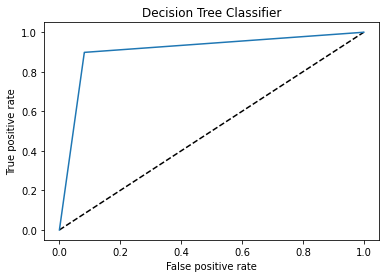

0.908143847277931

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

# Saving the model

In [88]:
import joblib
joblib.dump(dtc,'dtcfile.obj')

['dtcfile.obj']